<a href="https://colab.research.google.com/github/honmin123/BigData2024/blob/main/%E6%9C%9F%E4%B8%AD%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 中文處理
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"

fm.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
# 這一行能讓字體變得清晰
%config InlineBackend.figure_format = 'retina'
!pip install scikit-learn==1.1.3

--2024-04-13 08:35:08--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 172.67.129.58, 104.21.1.127, 2606:4700:3037::6815:17f, ...
Connecting to www.wfonts.com (www.wfonts.com)|172.67.129.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  21.8MB/s    in 0.5s    

2024-04-13 08:35:09 (21.8 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      


In [ ]:
## 基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
# 資料模組
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print('\n'.join(diabetes['DESCR'].split('\n')[:26]))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins


In [ ]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df['target'] = diabetes['target']
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<Axes: ylabel='Frequency'>

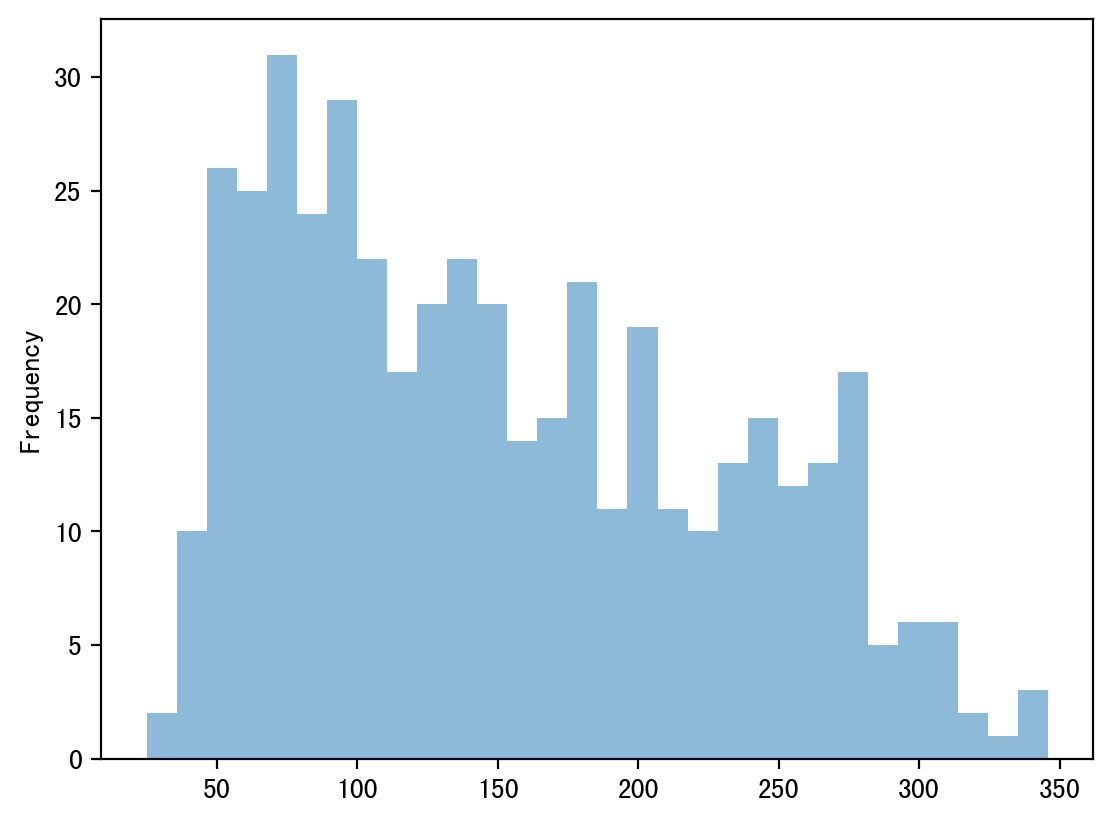

In [ ]:
df['target'].plot(kind='hist', bins=30, alpha=0.5)


In [ ]:
corr = df.corr()
corr


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


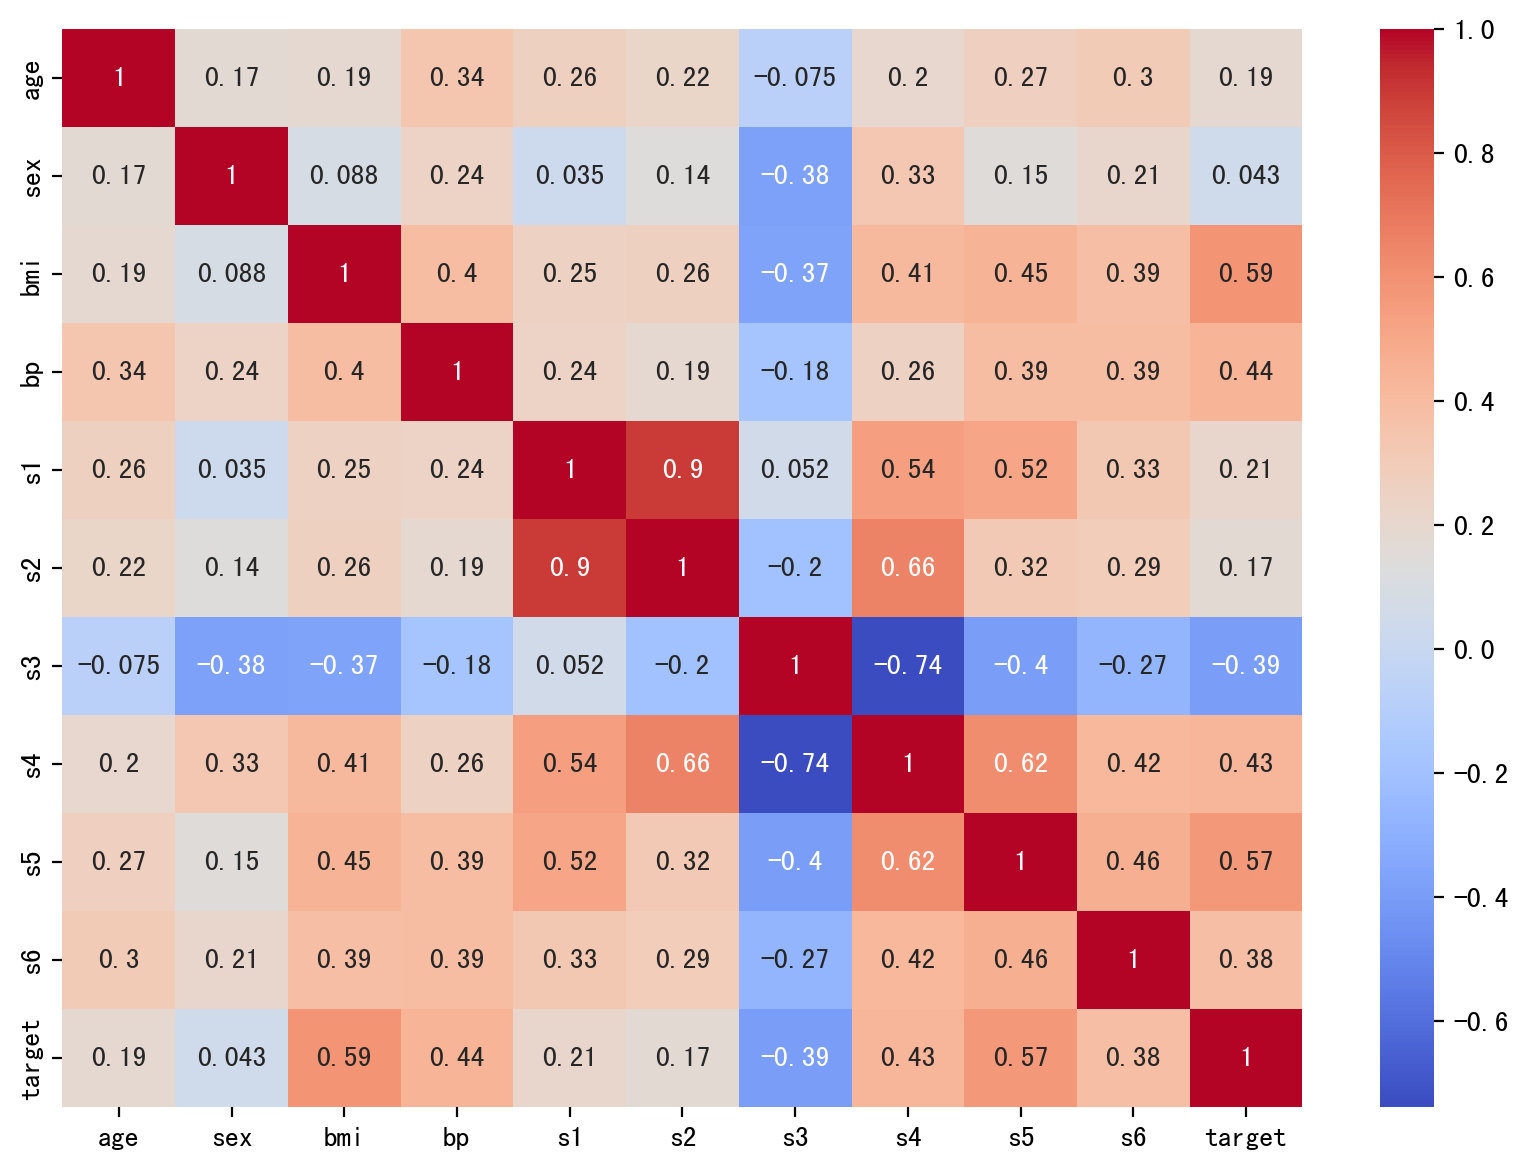

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))

sns.heatmap(corr, annot=True, cmap='coolwarm');

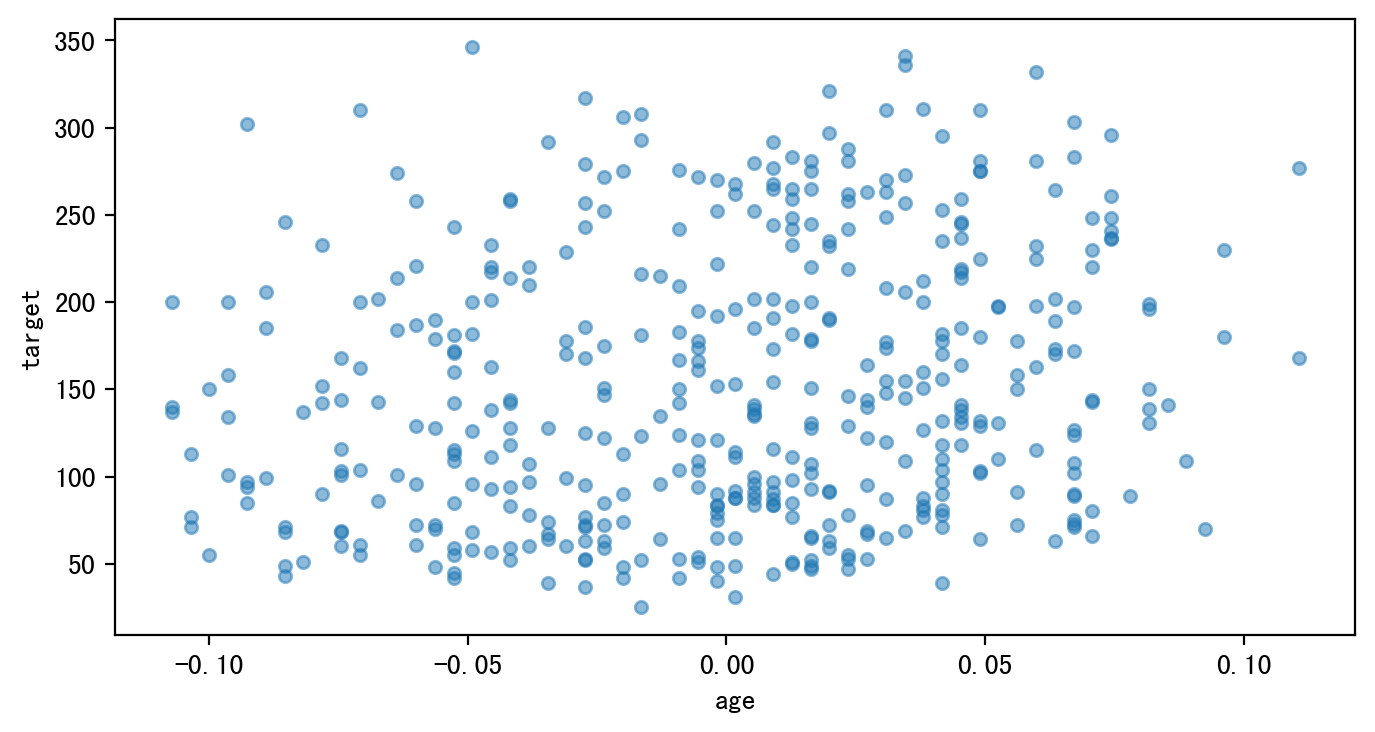

In [ ]:
df.plot(kind='scatter', x='age', y='target', alpha=0.5, figsize=(8,4));

In [ ]:
X = df[['age']]
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
print('訓練集的筆數：',len(X_train))
print('測試集的筆數：',len(X_test))
print('測試集所佔全部資料的百分比：',len(X_test)/len(X))

訓練集的筆數： 296
測試集的筆數： 146
測試集所佔全部資料的百分比： 0.33031674208144796


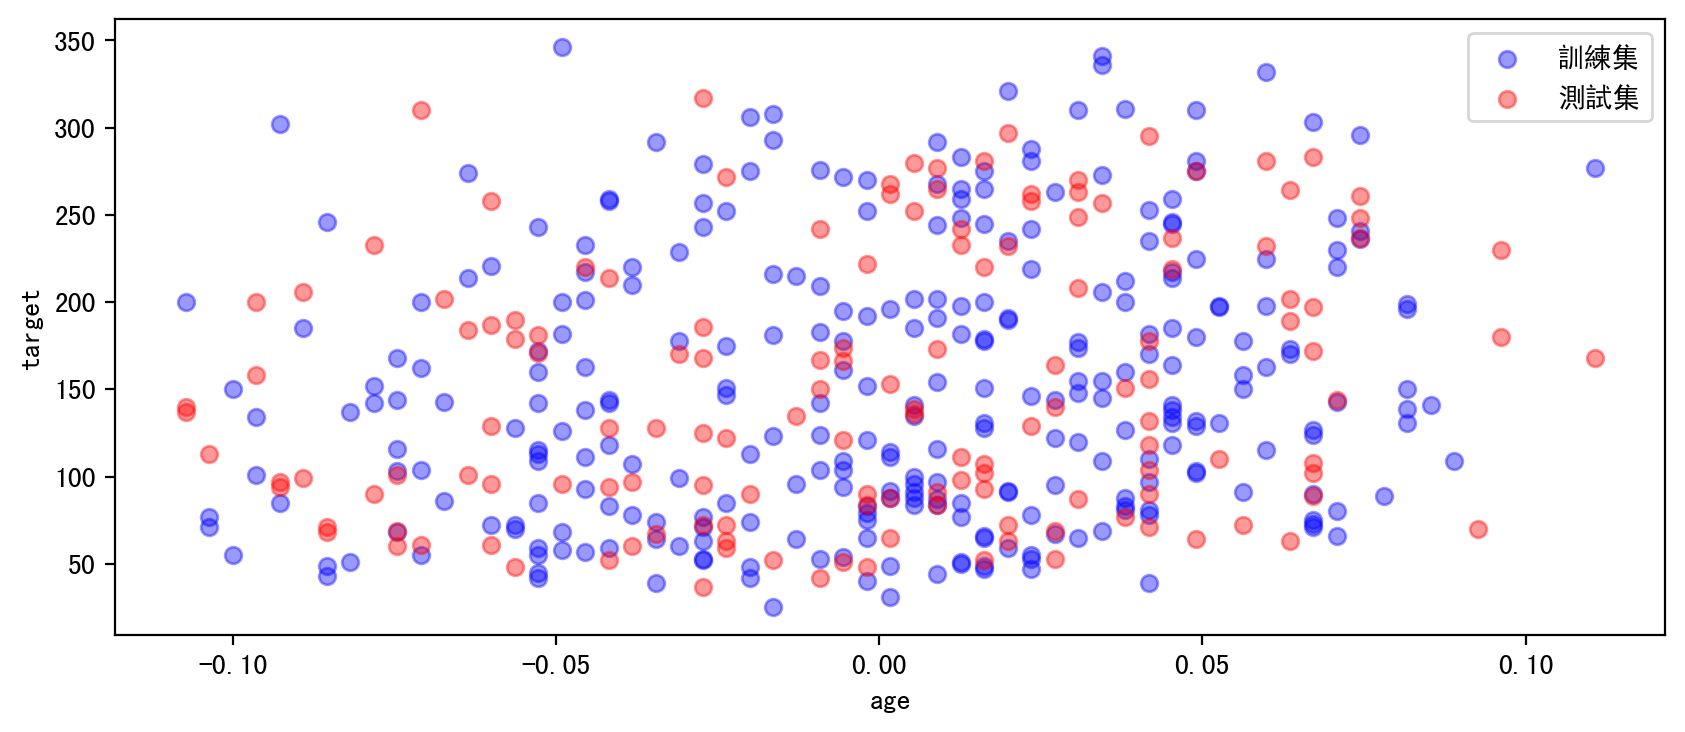

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(X_train, y_train, color='blue', alpha=0.4, label='訓練集')
ax.scatter(X_test, y_test, color='red', alpha=0.4, label='測試集')
ax.set_xlabel('age')
ax.set_ylabel('target')
ax.legend();

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm

from sklearn.linear_model import HuberRegressor, Ridge

model = LinearRegression()
model_svr =svm.SVR()
model.fit(X_train, y_train)
model_svr.fit(X_train, y_train)
huber = HuberRegressor(alpha=0.0)
huber.fit(X_train, y_train)

HuberRegressor(alpha=0.0)

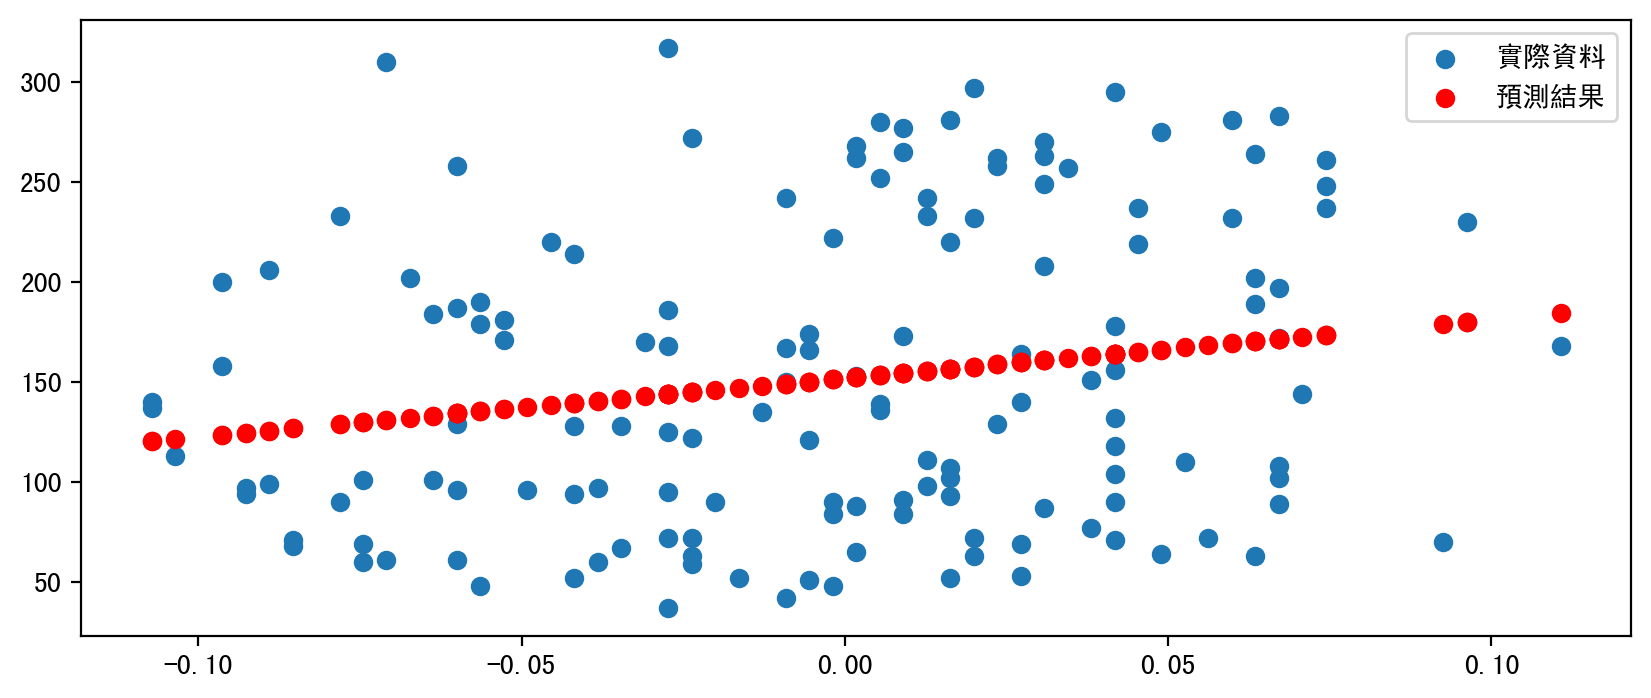

In [ ]:
y_pred=model.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred, c='r', label='預測結果')
plt.legend()

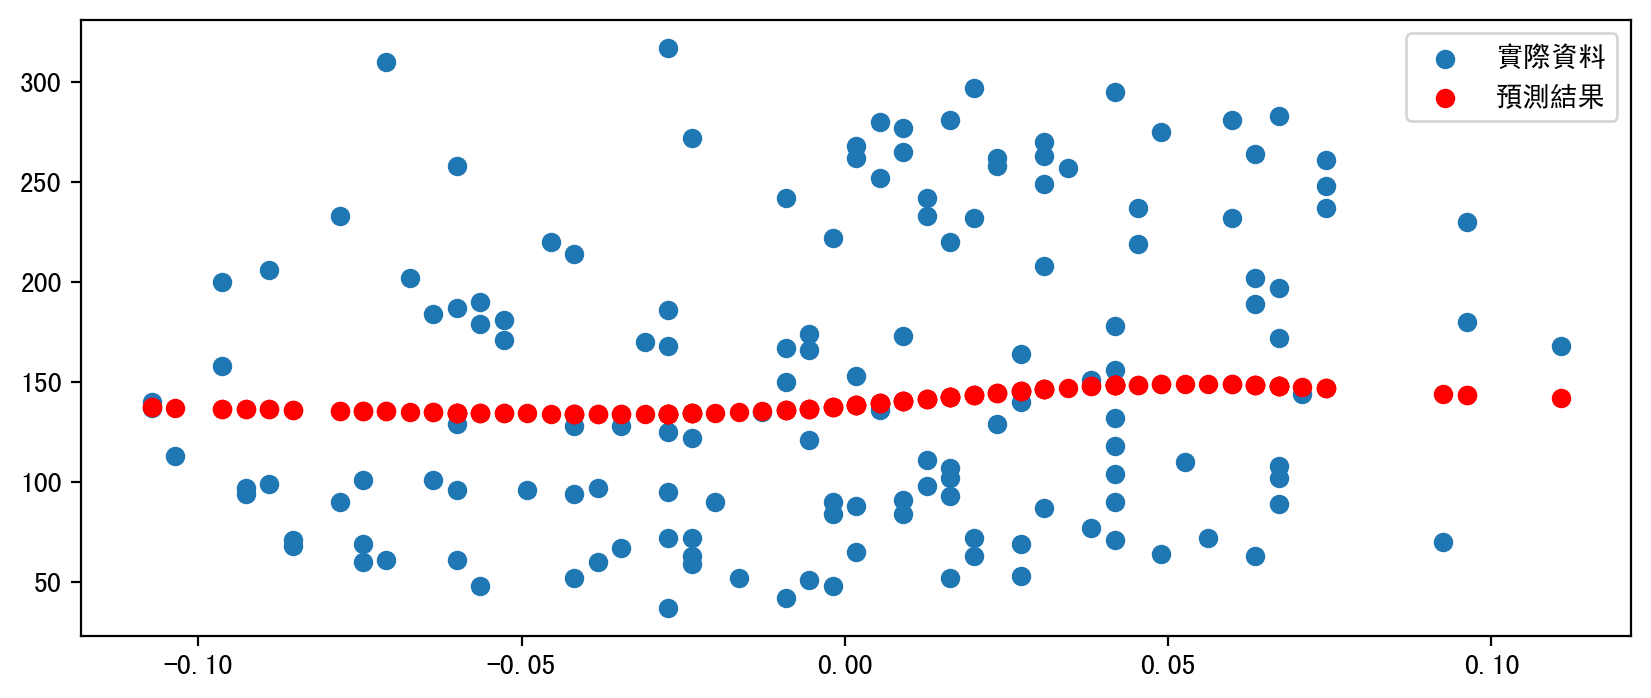

In [ ]:
y_pred_svr=model_svr.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred_svr, c='r', label='預測結果')
plt.legend()

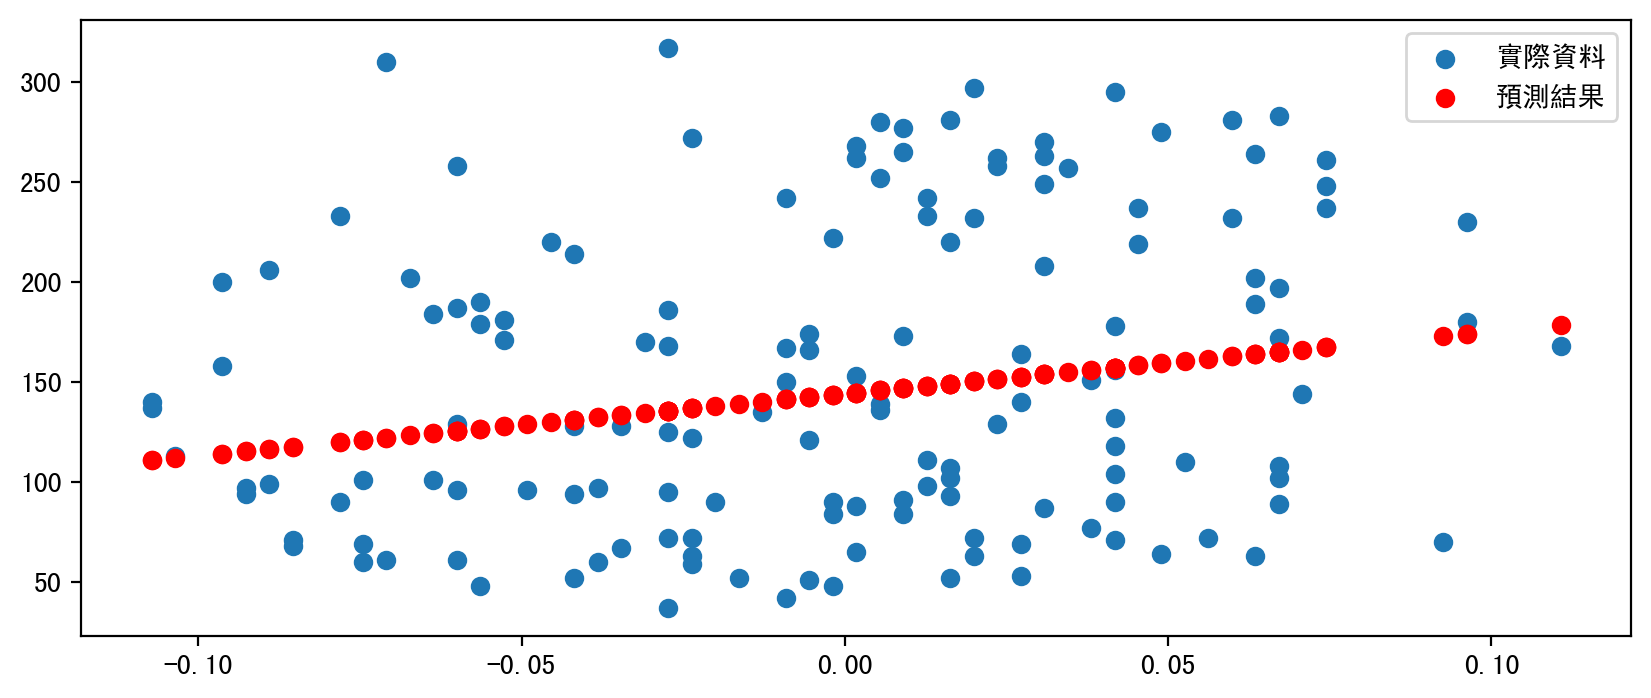

In [ ]:
y_huber=huber.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_huber, c='r', label='預測結果')
plt.legend()

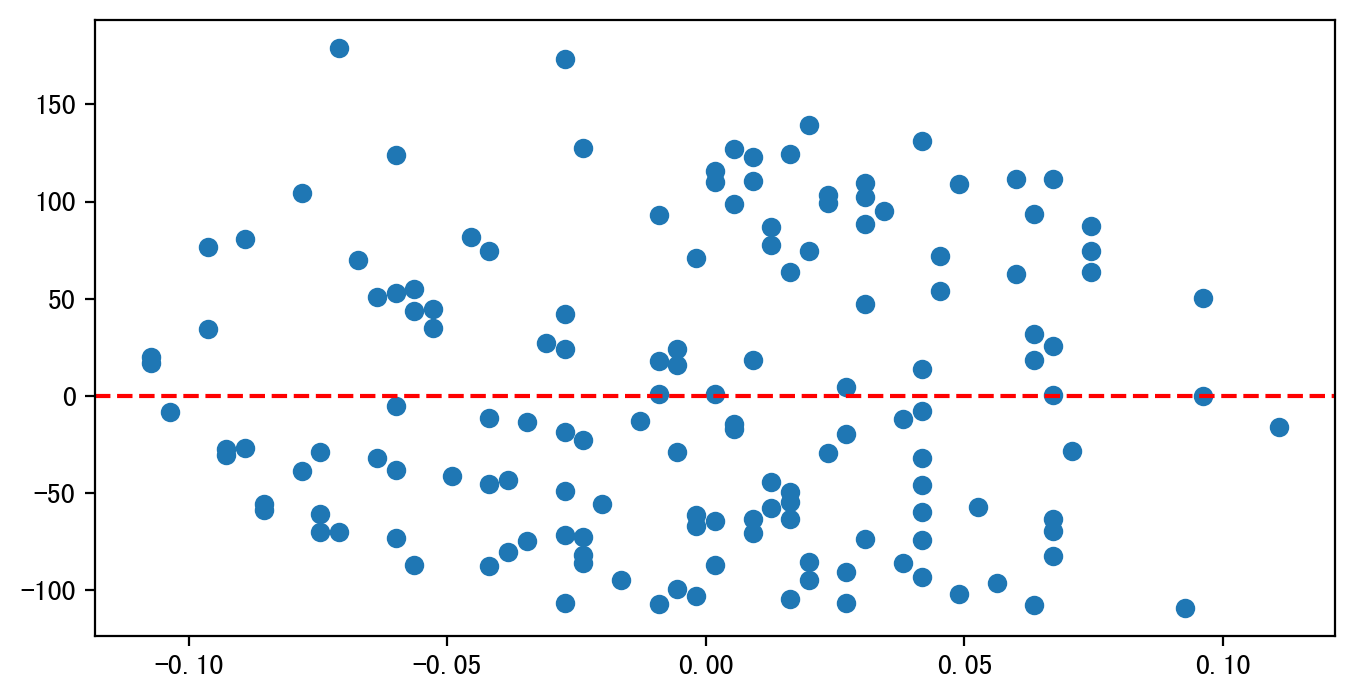

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred)
plt.axhline(0, c='r', ls='--');

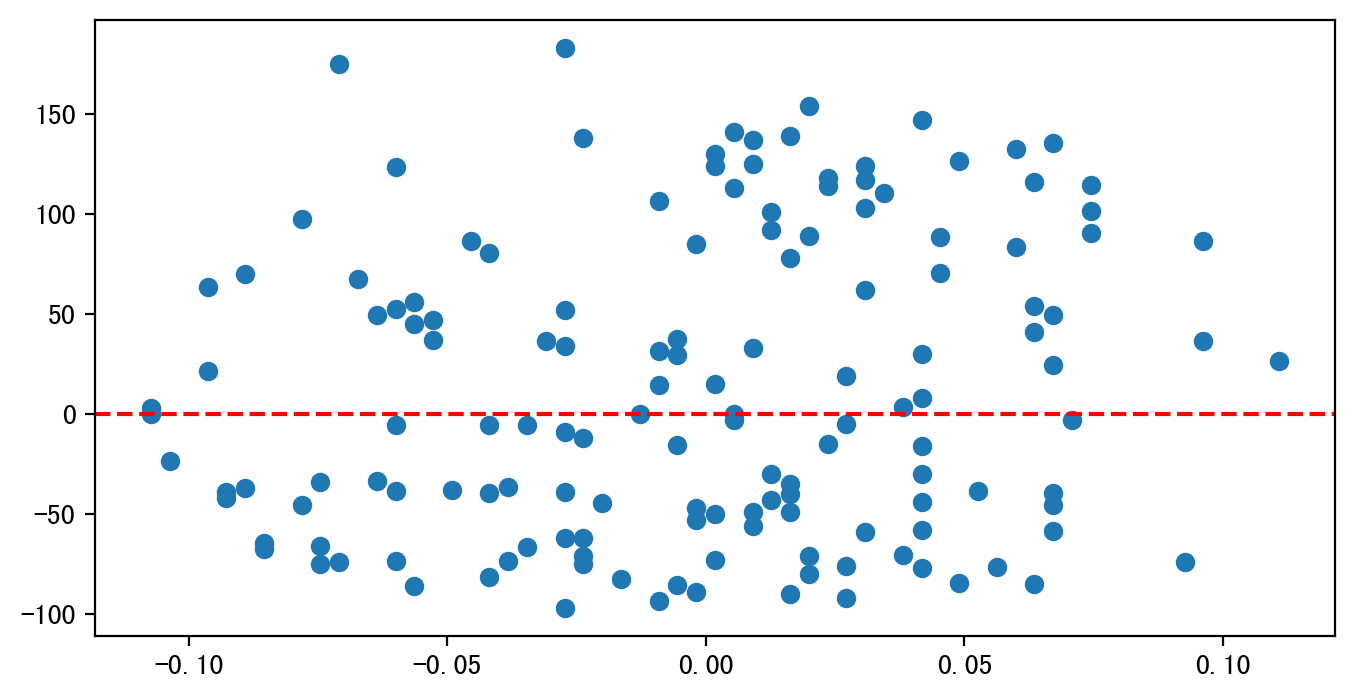

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred_svr)
plt.axhline(0, c='r', ls='--');

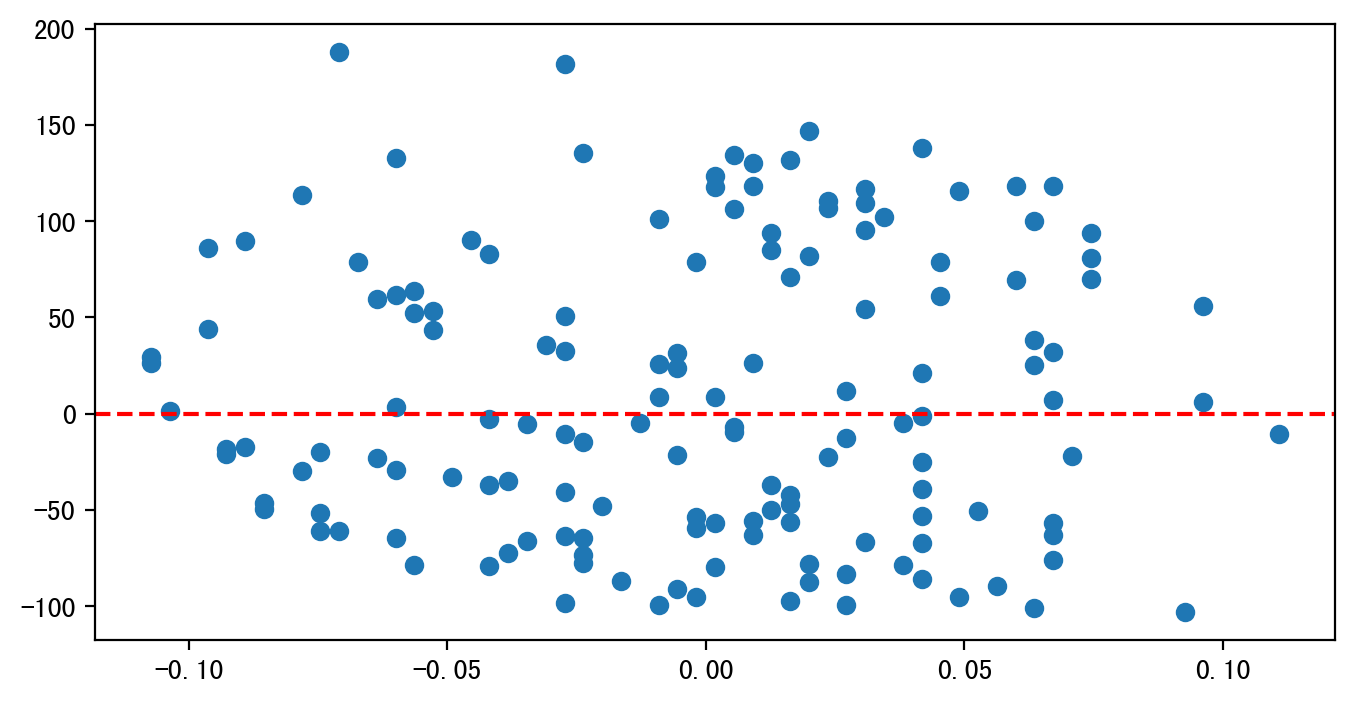

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_huber)
plt.axhline(0, c='r', ls='--');

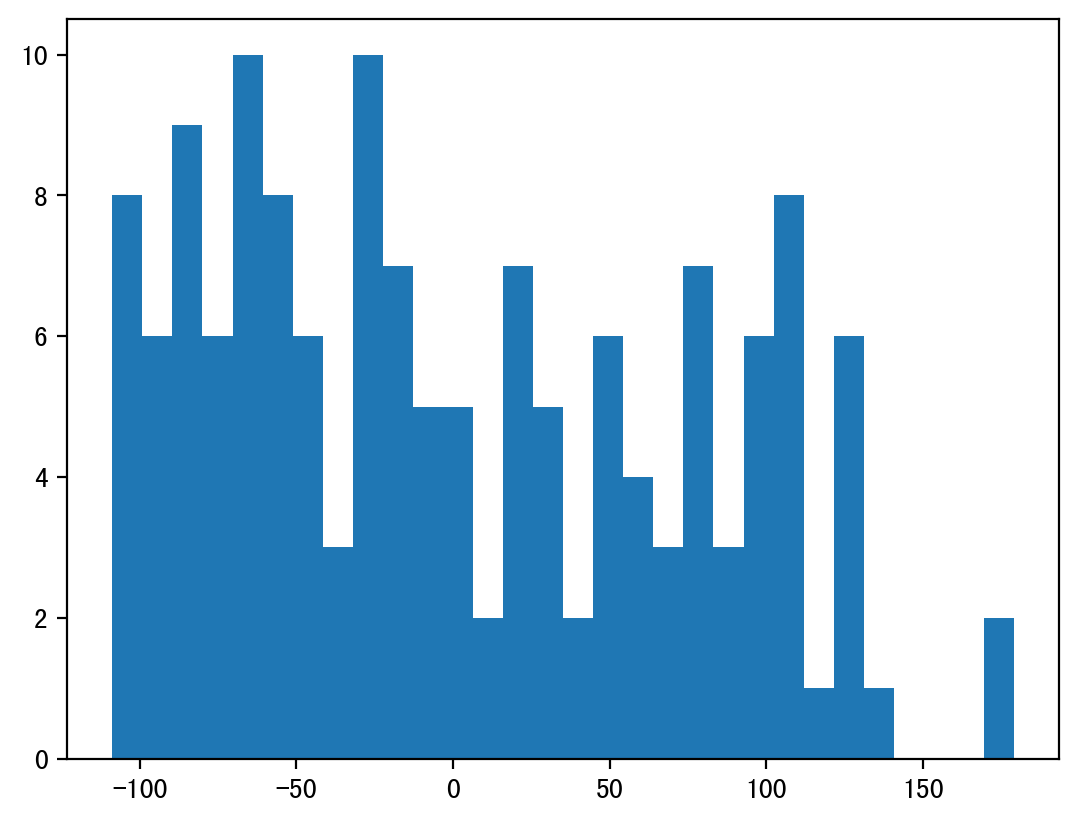

In [ ]:
plt.hist(y_test-y_pred, bins=30);

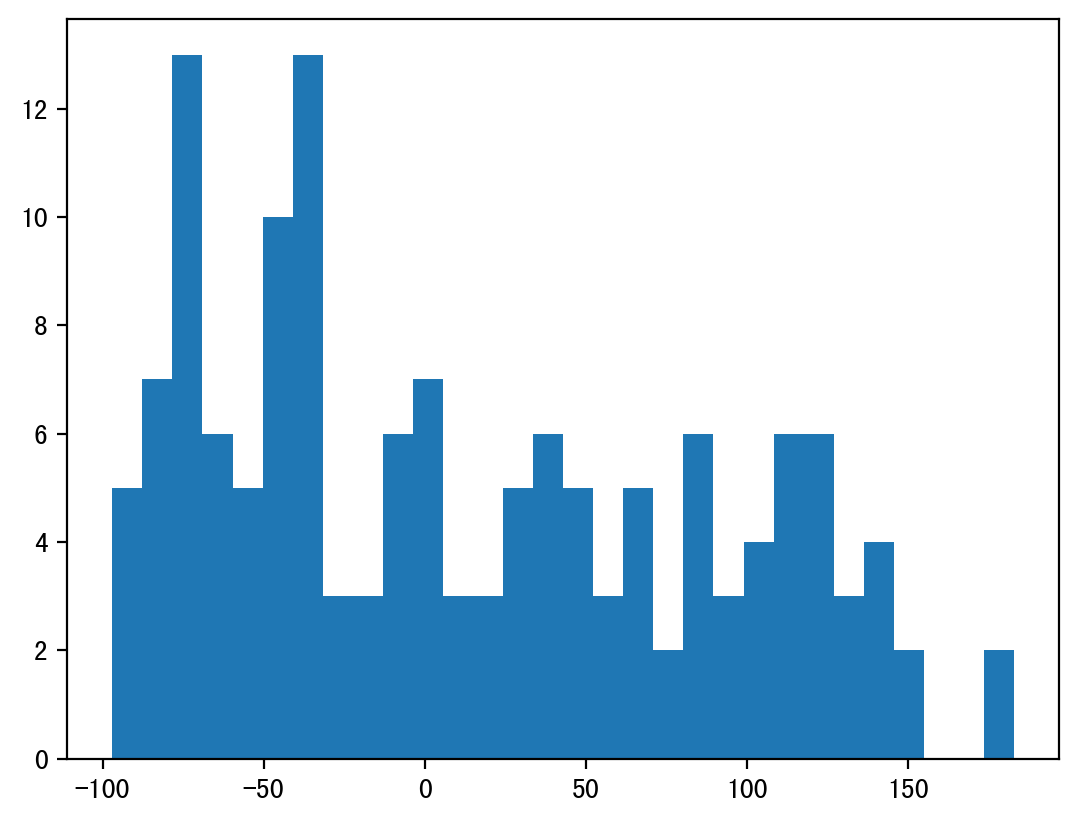

In [ ]:
plt.hist(y_test-y_pred_svr, bins=30);

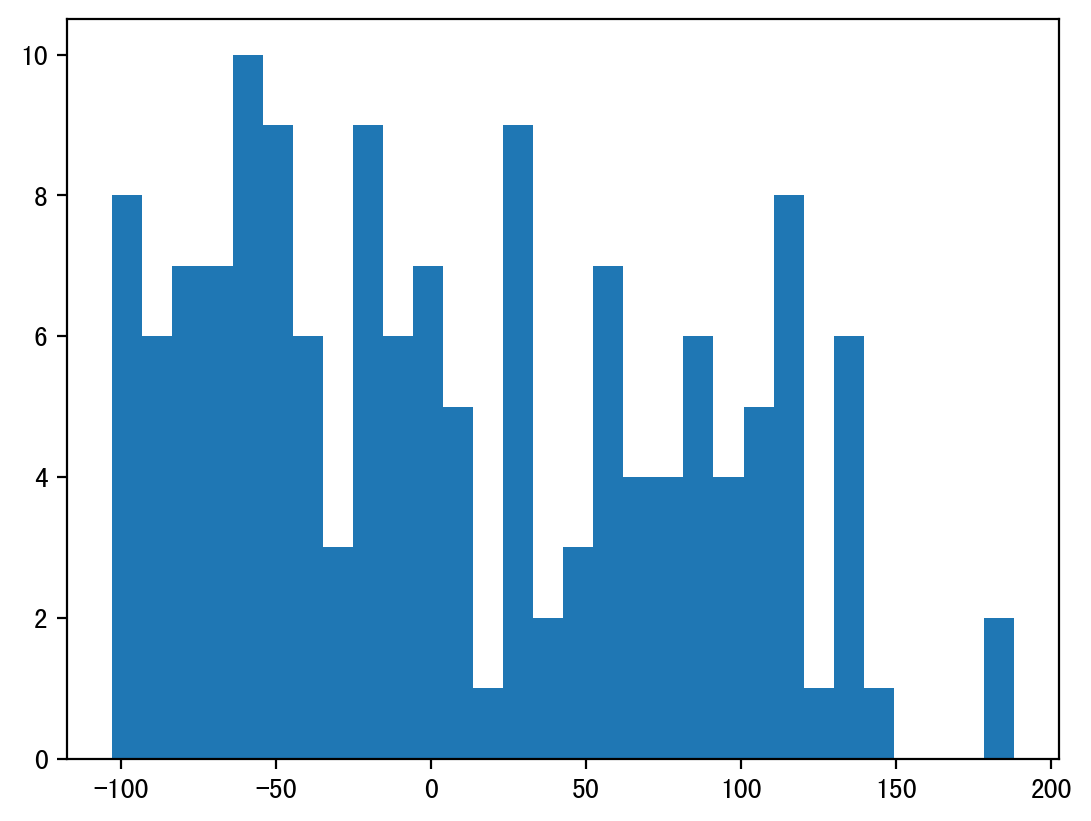

In [ ]:
plt.hist(y_test-y_huber, bins=30);

In [ ]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test['y_pred'] = y_pred
df_test['error'] = df_test['target']-df_test['y_pred']
df_test['error_abs'] = np.abs(df_test['error'])
df_test.sort_values(by='error_abs', ascending=False, inplace=True)
df_test.head()

,age,target,y_pred,error,error_abs
9,-0.070900,310.0,130.839426,179.160574,179.160574
141,-0.027310,317.0,143.622806,173.377194,173.377194
113,0.019913,297.0,157.471468,139.528532,139.528532
172,0.041708,295.0,163.863158,131.136842,131.136842
354,-0.023677,272.0,144.688088,127.311912,127.311912


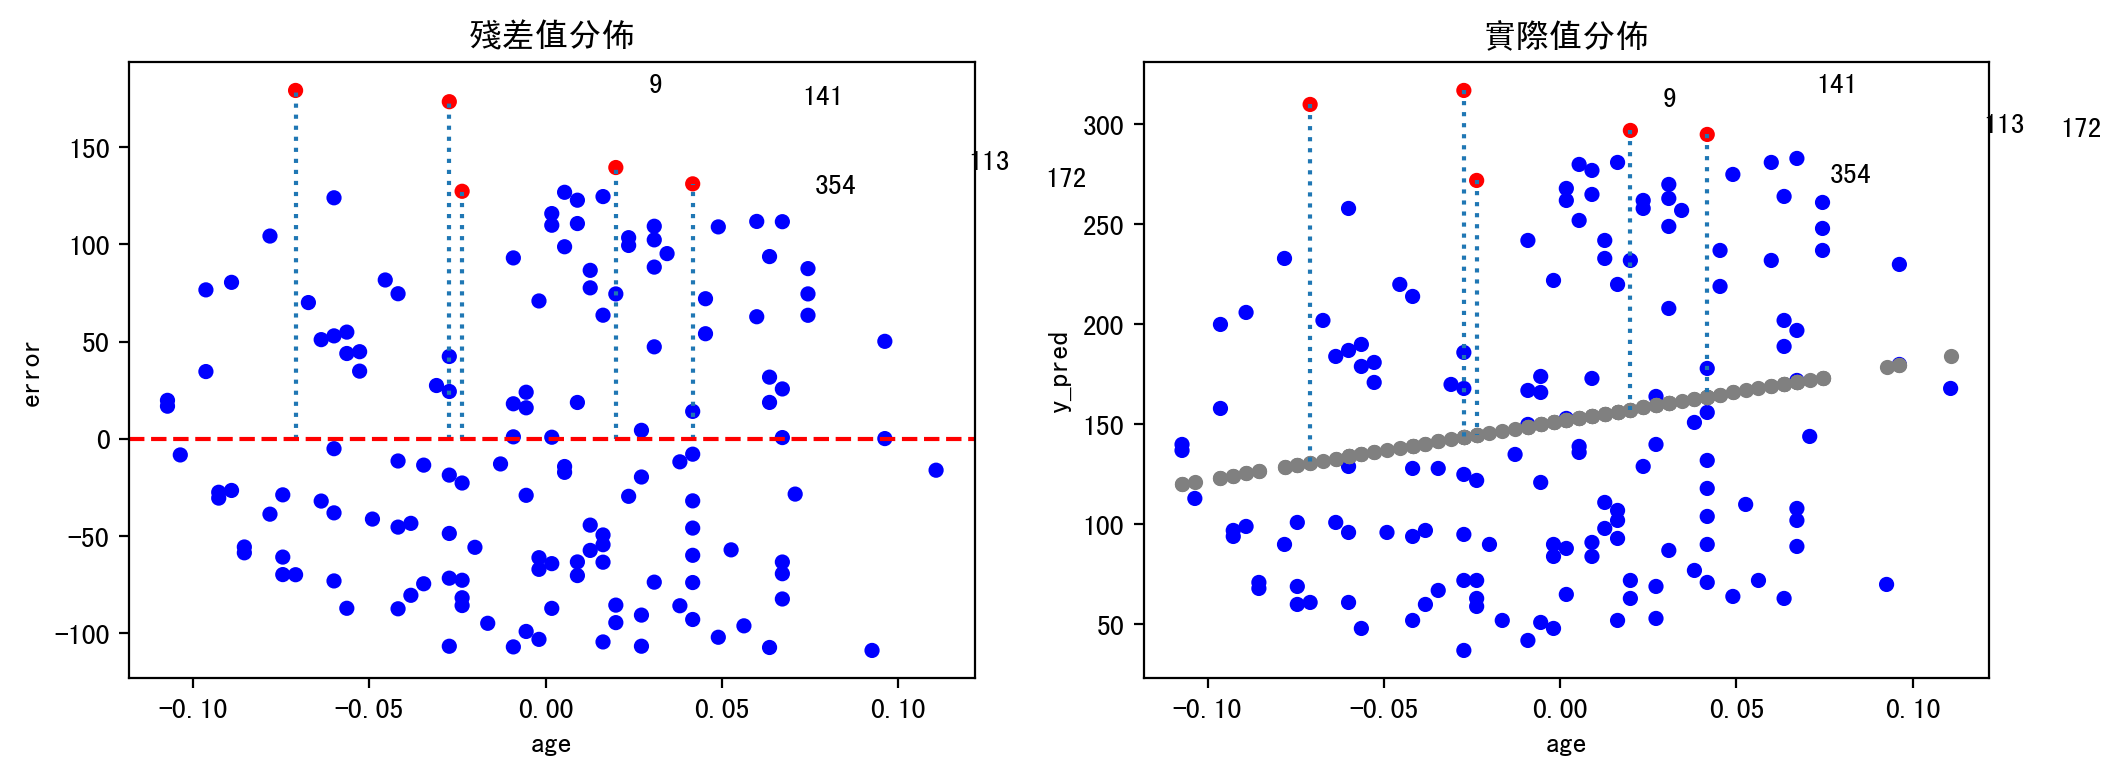

In [ ]:
colors = ['red']*5 + ['blue']*(len(df_test)-5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
# 第一張圖
ax = axes[0]
df_test.plot(kind='scatter', x='age', y='error', c=colors, ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'age']+0.1, y=df_test.loc[i,'error']-1, s=i)
    ax.vlines(x=df_test.loc[i,'age'], ymin=0, ymax=df_test.loc[i,'error'], ls=':')
ax.axhline(0, c='r', ls='--')
ax.set_title('殘差值分佈')
# plot_chinese(ax)

# 第二張圖
ax = axes[1]
df_test.plot(kind='scatter', x='age', y='target', c=colors, ax=ax)
df_test.plot(kind='scatter', x='age', y='y_pred', c='gray', ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'age']+0.1, y=df_test.loc[i,'target']-1, s=i)
    ax.vlines(x=df_test.loc[i,'age'],
              ymin=df_test.loc[i,'target'], ymax=df_test.loc[i,'y_pred'], ls=':')
ax.set_title('實際值分佈');
# plot_chinese(ax)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 5494.364781071106
Mean Absolute Error: 64.18883100949785
R2 Score: 0.0453315961729126


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred_svr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_svr))
print('R2 Score:', r2_score(y_test, y_pred_svr))

Mean Squred Error: 5748.798934235846
Mean Absolute Error: 64.63024751292637
R2 Score: 0.0011226190555385651


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_huber))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_huber))
print('R2 Score:', r2_score(y_test, y_huber))

Mean Squred Error: 5575.384680722112
Mean Absolute Error: 63.65360693339249
R2 Score: 0.03125405648269619


In [ ]:
model.predict([[6]])

array([1911.19744147])

In [ ]:
model.intercept_+ model.coef_*6

array([1911.19744147])

In [ ]:
X_train['age1'] = X_train['age']**2
X_test['age1'] = X_test['age']**2
X_train.head()

,age,age1
231,0.009016,0.000081
325,-0.001882,0.000004
193,0.009016,0.000081
109,0.038076,0.001450
195,0.027178,0.000739


In [ ]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 5487.668867779563
Mean Absolute Error: 64.17007373674741
R2 Score: 0.046495038555956714


In [ ]:

model_2.intercept_, model_2.coef_

(150.34857821486145, array([299.07208265, 599.13731461]))

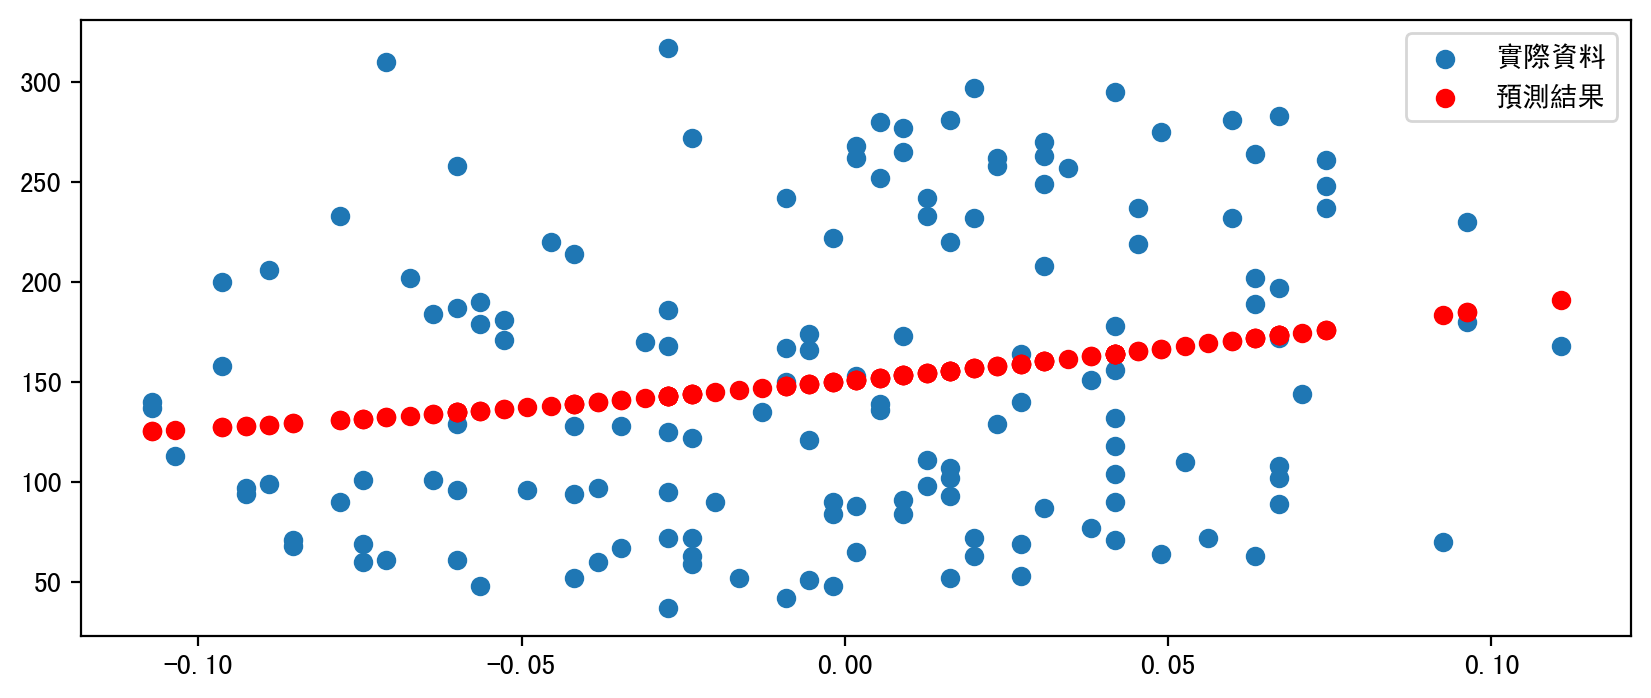

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(X_test.iloc[:,0], y_test, label='實際資料')
plt.scatter(X_test.iloc[:,0], y_pred, c='r', label='預測結果')
plt.legend();
# plot_chinese(ax)